In [3]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate();
Pkg.add("ForwardDiff");
Pkg.add("LinearAlgebra");
Pkg.add("PyPlot")

  Activating environment at `~/cmu_lectures/cmu_optimal_control_course/lecturenotes/lecture_notes/Lecture 3/Project.toml`
    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
    Updating `~/cmu_lectures/cmu_optimal_control_course/lecturenotes/lecture_notes/Lecture 3/Project.toml`
  [f6369f11] + ForwardDiff v0.10.35
    Updating `~/cmu_lectures/cmu_optimal_control_course/lecturenotes/lecture_notes/Lecture 3/Manifest.toml`
  [d360d2e6] + ChainRulesCore v1.16.0
  [9e997f8a] + ChangesOfVariables v0.1.7
  [bbf7d656] + CommonSubexpressions v0.3.0
  [34da2185] + Compat v4.6.1
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [ffbed154] + DocStringExtensions v0.9.3
  [f6369f11] + ForwardDiff v0.10.35
  [3587e190] + InverseFunctions v0.1.9
  [92d709cd] + IrrationalConstants v0.2.2
  [692b3bcd] + JLLWrappers v1.4.1
  [2ab3a3ac] + LogExpFunctions v0.3.24
  [1914dd2f] + MacroTools v0.5.10
  [77ba4419] + NaNMath v1.0.2
  [21216c6a] + Preference

In [4]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [5]:
function f(x)
    return x.^4 + x.^3 - x.^2 - x
end

f (generic function with 1 method)

In [6]:
function ∇f(x)
    return 4.0*x.^3 + 3.0*x.^2 - 2.0*x - 1.0
end

∇f (generic function with 1 method)

In [7]:
function ∇2f(x)
    return 12.0*x.^2 + 6.0*x - 2.0
end

∇2f (generic function with 1 method)

In [8]:
x = LinRange(-1.75,1.25,1000)

1000-element LinRange{Float64}:
 -1.75,-1.747,-1.74399,-1.74099,-1.73799,…,1.23799,1.24099,1.24399,1.247,1.25

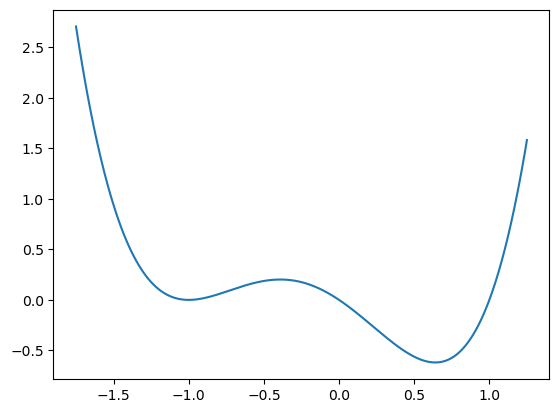

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1d3b12080>

In [29]:
p = plot(x,f(x))

In [9]:
function newton_step(x0)
    xn = x0 - ∇2f(x0)\∇f(x0)
end

newton_step (generic function with 1 method)

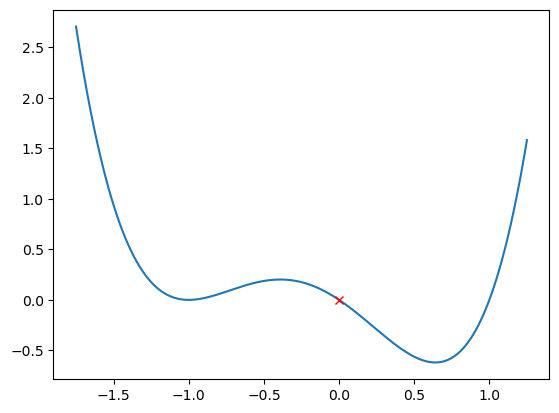

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f275dbaa820>

In [10]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

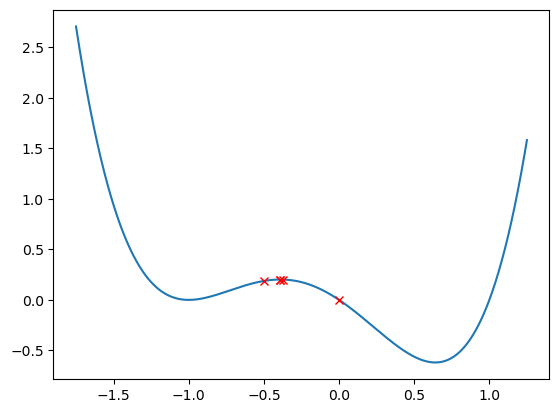

5-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f275d9e1970>
 PyObject <matplotlib.lines.Line2D object at 0x7f275d9e1a60>
 PyObject <matplotlib.lines.Line2D object at 0x7f275d9e1b20>
 PyObject <matplotlib.lines.Line2D object at 0x7f275d9e1c10>
 PyObject <matplotlib.lines.Line2D object at 0x7f275d9e1cd0>

In [15]:
xnew = newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

In [16]:
∇2f(0.0)

-2.0

In [17]:
function regularized_newton_step(x0)
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    xn = x0 - H\∇f(x0)
end

regularized_newton_step (generic function with 1 method)

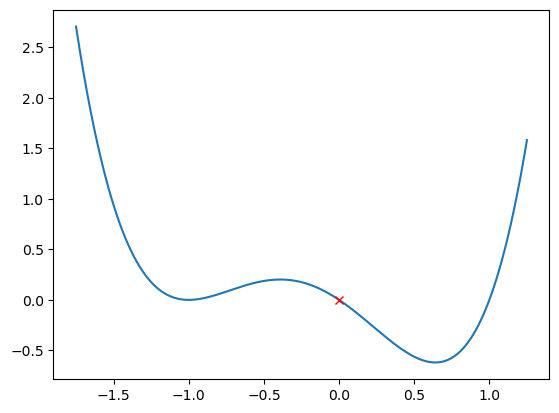

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f275d93c190>

In [19]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

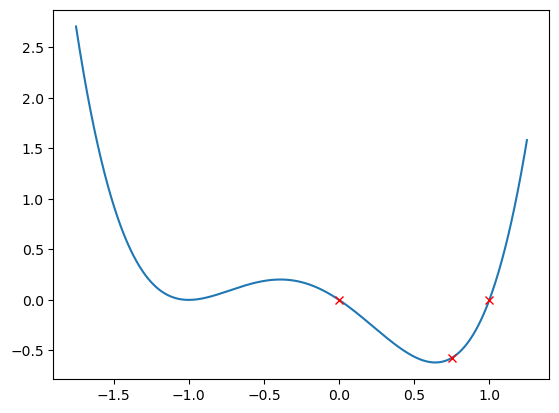

3-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f275d878dc0>
 PyObject <matplotlib.lines.Line2D object at 0x7f275d878eb0>
 PyObject <matplotlib.lines.Line2D object at 0x7f275d878f70>

In [21]:
xnew = regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")